In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

from srim import TRIM, Ion, Layer, Target
from srim.output import Results

In [ ]:
# Construct a 3MeV Nickel ion
ion = Ion('C', energy=3.0e6)

# Construct a layer of nick 20um thick with a displacement energy of 30 eV
layer = Layer({
        'Ni': {
            'stoich': 1.0,
            'E_d': 30.0,
            'lattice': 0.0,
            'surface': 3.0
        }}, density=8.9, width=20000.0)

# Construct a target of a single layer of Nickel
target = Target([layer])

# Initialize a TRIM calculation with given target and ion for 25 ions, quick calculation
trim = TRIM(target, ion, number_ions=25, calculation=1)

# Specify the directory of SRIM.exe
# For windows users the path will include C://...
srim_executable_directory = '/Users/cbharathulwar/Documents/Research/Walsworth/SRIM-2013'

# takes about 10 seconds on my laptop
results = trim.run(srim_executable_directory)
# If all went successfull you should have seen a TRIM window popup and run 25 ions!

[mvk-info] MoltenVK version 1.3.0, supporting Vulkan version 1.3.313.
	The following 126 Vulkan extensions are supported:
	VK_KHR_16bit_storage v1
	VK_KHR_8bit_storage v1
	VK_KHR_bind_memory2 v1
	VK_KHR_buffer_device_address v1
	VK_KHR_calibrated_timestamps v1
	VK_KHR_copy_commands2 v1
	VK_KHR_create_renderpass2 v1
	VK_KHR_dedicated_allocation v3
	VK_KHR_deferred_host_operations v4
	VK_KHR_depth_stencil_resolve v1
	VK_KHR_descriptor_update_template v1
	VK_KHR_device_group v4
	VK_KHR_device_group_creation v1
	VK_KHR_driver_properties v1
	VK_KHR_dynamic_rendering v1
	VK_KHR_external_fence v1
	VK_KHR_external_fence_capabilities v1
	VK_KHR_external_memory v1
	VK_KHR_external_memory_capabilities v1
	VK_KHR_external_semaphore v1
	VK_KHR_external_semaphore_capabilities v1
	VK_KHR_fragment_shader_barycentric v1
	VK_KHR_format_feature_flags2 v2
	VK_KHR_get_memory_requirements2 v1
	VK_KHR_get_physical_device_properties2 v2
	VK_KHR_get_surface_capabilities2 v1
	VK_KHR_imageless_framebuffer v1
	VK

In [28]:
output_directory = '/Users/cbharathulwar/Documents/Research/Walsworth/SRIM-2013'
os.makedirs(output_directory, exist_ok=True)
TRIM.copy_output_files('/Users/cbharathulwar/Documents/Research/Walsworth/SRIM-2013/SRIM Outputs/Run2', output_directory)

In [24]:
def plot_damage_energy(folder, ax):
    results = Results(folder)
    phon = results.phonons
    dx = max(phon.depth) / 100.0  # to units of Angstroms
    energy_damage = (phon.ions + phon.recoils) * dx
    ax.plot(phon.depth, energy_damage / phon.num_ions, label='{}'.format(folder))
    return sum(energy_damage)


def plot_ionization(folder, ax):
    results = Results(folder)
    ioniz = results.ioniz
    dx = max(ioniz.depth) / 100.0  # to units of Angstroms
    ax.plot(ioniz.depth, ioniz.ions, label='Ionization from Ions')
    ax.plot(ioniz.depth, ioniz.recoils, label='Ionization from Recoils')


def plot_vacancies(folder, ax):
    results = Results(folder)
    vac = results.vacancy
    vacancy_depth = vac.knock_ons + np.sum(vac.vacancies, axis=1)
    ax.plot(vac.depth, vacancy_depth, label="Total vacancies at depth")
    return sum(vacancy_depth)


folders = ['test_files/2', 'test_files/4']
image_directory = 'examples/images'
os.makedirs(image_directory, exist_ok=True)

/opt/homebrew/Caskroom/miniconda/base/envs/sbi/lib/python3.12/site-packages/srim/output.py:16: SyntaxWarning: invalid escape sequence '\d'
  int_regex = '[+-]?\d+'
/opt/homebrew/Caskroom/miniconda/base/envs/sbi/lib/python3.12/site-packages/srim/output.py:29: SyntaxWarning: invalid escape sequence '\s'
  ion_regex = 'Ion\s+=\s+({})\s+Energy\s+=\s+({})\s+keV'.format(
/opt/homebrew/Caskroom/miniconda/base/envs/sbi/lib/python3.12/site-packages/srim/output.py:39: SyntaxWarning: invalid escape sequence '\s'
  match_target = re.search(b'(?<=====\r\n)Layer\s+\d+\s+:.*?(?=====)', output, re.DOTALL)
/opt/homebrew/Caskroom/miniconda/base/envs/sbi/lib/python3.12/site-packages/srim/output.py:43: SyntaxWarning: invalid escape sequence '\s'
  'Layer\s+(?P<i>\d+)\s+:\s+(.+)\r\n'
/opt/homebrew/Caskroom/miniconda/base/envs/sbi/lib/python3.12/site-packages/srim/output.py:44: SyntaxWarning: invalid escape sequence '\s'
  'Layer Width\s+=\s+({0})\s+A\s+;\r\n'
/opt/homebrew/Caskroom/miniconda/base/envs/sbi/

FileNotFoundError: [Errno 2] No such file or directory: 'test_files/2/IONIZ.txt'

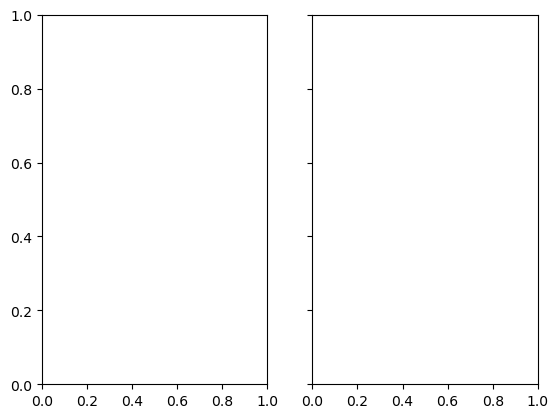

In [25]:
fig, axes = plt.subplots(1, len(folders), sharex=True, sharey=True)

for ax, folder in zip(np.ravel(axes), folders):
    energy_damage = plot_damage_energy(folder, ax)
    print("Damage energy: {} eV".format(energy_damage))
    ax.set_xlabel('Depth [Angstroms]')
    ax.set_ylabel('eV')
    ax.legend()

fig.suptitle('Damage Energy vs. Depth', fontsize=15)
fig.set_size_inches((20, 6))
fig.savefig(os.path.join(image_directory, 'damagevsdepth.png'), transparent=True)